# FORESEE - Up-Philic Scalar

### Load Libraries 

In [1]:
import numpy as np
import os
from src.foresee import Foresee, Utility, Model

## 1. Initialization 


All function that we will need are included in the FORESEE package. We start by simply initializing it: 

In [2]:
foresee = Foresee()

The dark Higgs is mainly produced via b-quark decay. To start, let us have a look at the b-quark spectrum in terms of the angle with respect to the beam axis $\theta$ and the momentum $p$. This can be done using the function `get_spectrumplot` which requires the MC particle ID (or simply pid), the MC generator and the energy. The units on the coloraxis are pb/bin. 

FORESEE provides the 2D spectrum as tables for a variety of particles ($\pi^0$, $\eta$, ...), generators (SIBYLL, EPOSLHC, QGSJET, PYTHIA) and collision energies (14, 27 and 100 TeV). The datafiles are stored in the directory `files/hadrons`. 

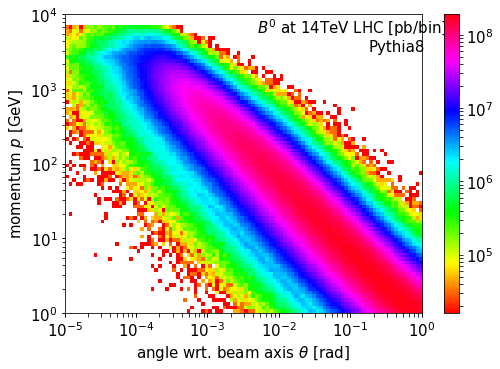

In [3]:
plot=foresee.get_spectrumplot(pid="221", generator="EPOSLHC", energy="14", prange=[[-5, 0, 100],[ 0, 4, 80]])
plot.text(-2.3,3.75, r"$B^0$ at 14TeV LHC [pb/bin]",fontsize=15,color="k",rotation=0)
plot.text(-0.75,3.5, r"Pythia8",fontsize=15,color="k",rotation=0)
plot.show()

## 2. Specifying the Model: Dark Higgs

The phenomenology of the up-philic Scalar $S$ can be described by the following Lagrangian

\begin{equation}
 \mathcal{L} =  - \frac{1}{2} m_{S}^2\ S^2  - g_u \bar u \ u \ S
\end{equation}

with the dark Higgs mass $m_{S}$ and the coupling parameter $g_u$ as free parameters. For the search for up-philic Scalar boson at forward experiments we need to know i) the *production rate*, ii) the *lifetime* and iii) possibly the *decay branching fractions* of dark Higgs as function of those two parameters. All properties are specified in the `Model` class. We initialize it with the name of the model as argument. 

In [4]:
energy = "14"
modelname = "UpPhilic"
model = Model(modelname)

**Production** The up-philic Scalar is mainly produced in eta and kaon decays. For this we need to specify the total branching fraction into the LLP as function of the `coupling` and the `mass`. 

\begin{equation}
    \text{BR}(\eta \to \pi^0  S) = 1.26 \cdot 10^{5} \times [(1-(m_\pi+m_a)^2/m_\eta^2)(1-(m_\pi-m_a)^2/m_\eta^2)]^{1/2}\times  g_u^2 
\end{equation}

\begin{equation}
    \text{BR}(\eta' \to \pi^0 S) = 2.73 \cdot 10^{2} \times [(1-(m_\pi+m_a)^2/m_{\eta'}^2)(1-(m_\pi-m_a)^2/m_{\eta'}^2)]^{1/2}\times  g_u^2 
\end{equation}

\begin{equation}
    \text{BR}(K^+ \to \pi^+ S) = 7.42 \times [(1-(m_\pi+m_a)^2/m_K^2)(1-(m_\pi-m_a)^2/m_K^2)]^{1/2} \times  g_u^2 
\end{equation}

In [5]:
model.add_production_2bodydecay(
    pid0 = "221",
    pid1 = "111",
    br = "1.26e5 * coupling**2 * np.sqrt((1-(mass+0.135)**2/0.547**2)*(1-(mass-0.135)**2/0.547**2))",
    generator = "EPOSLHC",
    energy = energy,
    nsample = 10,
)

model.add_production_2bodydecay(
    pid0 = "331",
    pid1 = "111",
    br = "273. * coupling**2 * np.sqrt((1-(mass+0.135)**2/0.957**2)*(1-(mass-0.135)**2/0.957**2))",
    generator = "EPOSLHC",
    energy = energy,
    nsample = 10,
)

model.add_production_2bodydecay(
    pid0 = "321",
    pid1 = "211",
    br = "7.42 * coupling**2 * np.sqrt((1-(mass+0.135)**2/0.49368**2)*(1-(mass-0.135)**2/0.49368**2))",
    generator = "EPOSLHC",
    energy = energy,
    nsample = 10,
)

model.add_production_2bodydecay(
    pid0 = "-321",
    pid1 = "-211",
    br = "7.42 * coupling**2 * np.sqrt((1-(mass+0.135)**2/0.49368**2)*(1-(mass-0.135)**2/0.49368**2))",
    generator = "EPOSLHC",
    energy = energy,
    nsample = 10,
)

**Lifetime:** For most models the lifetime can be written as $\ c\tau(m,g)\  =\  c\tau(m,g_*) \ \cdot\  g_*^2 \ / \ g^{2}$ where $m$ is the mass, $g$ is the coupling and $g_*$ is some reference coupling. In this case, we can provide a table of masses $m$ and lifetimes $c\tau(m,g_*)$ at a reference coupling $g_*$ using `model.set_ctau_1d`. Alternatively, one can also provide a table of masses $m$, couplings $g$ and lifetimes $c\tau(m,g)$ via `model.set_ctau_2d()`. 

In [6]:
model.set_ctau_1d(
    filename="files/models/"+modelname+"/ctau.txt", 
    coupling_ref=1
)

## 3. Generate LLP Spectra

After we have specified the model, let us generate the LLP spectra. We first set the model we just created. 

In [7]:
foresee.set_model(model=model)

Let's first look at one benchmark scenario with $m_{S}=350$ MeV and $g_u=10^{-7}$ using the function `foresee.get_llp_spectrum()`. 

save data to file: files/models/UpPhilic/LLP_spectra/14TeV_321_m_0.35.npy
321 3.50e-05 5.37e-08
save data to file: files/models/UpPhilic/LLP_spectra/14TeV_331_m_0.35.npy
331 4.16e-02 3.06e-04
save data to file: files/models/UpPhilic/LLP_spectra/14TeV_221_m_0.35.npy
221 9.03e+01 9.55e-01
save data to file: files/models/UpPhilic/LLP_spectra/14TeV_-321_m_0.35.npy
-321 3.41e-05 3.50e-08


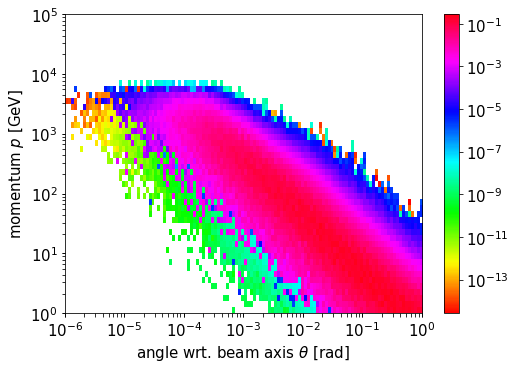

In [8]:
plt = foresee.get_llp_spectrum(mass=0.35, coupling=1e-7, do_plot=True, print_stats=True)
plt.show()

We can now produce a set of LLP spectra for various masses and unit coupling and save them.  

In [9]:
masses = [   
    0.01  , 0.0126, 0.0158, 0.02  , 0.0251, 
    0.0316, 0.0398, 0.0501, 0.0631, 0.0794, 
    0.1   , 0.1122, 0.1259, 0.1413, 0.1585, 
    0.1778, 0.1995, 0.2239, 0.2512, 0.269 , 
    0.270 , 0.271 , 0.275 , 0.28  , 0.29  , 
    0.3   , 0.3162, 0.35  , 0.3981, 0.41  , 
    0.42  , 0.4467, 0.5012, 0.5623, 0.631 ,
    0.7079, 0.7943, 0.81  , 0.82  , 0.8913, 
    1.    
]
for mass in masses:
    foresee.get_llp_spectrum(mass=mass,coupling=1)

save data to file: files/models/UpPhilic/LLP_spectra/14TeV_321_m_0.01.npy
save data to file: files/models/UpPhilic/LLP_spectra/14TeV_331_m_0.01.npy
save data to file: files/models/UpPhilic/LLP_spectra/14TeV_221_m_0.01.npy
save data to file: files/models/UpPhilic/LLP_spectra/14TeV_-321_m_0.01.npy
save data to file: files/models/UpPhilic/LLP_spectra/14TeV_321_m_0.0126.npy
save data to file: files/models/UpPhilic/LLP_spectra/14TeV_331_m_0.0126.npy
save data to file: files/models/UpPhilic/LLP_spectra/14TeV_221_m_0.0126.npy
save data to file: files/models/UpPhilic/LLP_spectra/14TeV_-321_m_0.0126.npy
save data to file: files/models/UpPhilic/LLP_spectra/14TeV_321_m_0.0158.npy
save data to file: files/models/UpPhilic/LLP_spectra/14TeV_331_m_0.0158.npy
save data to file: files/models/UpPhilic/LLP_spectra/14TeV_221_m_0.0158.npy
save data to file: files/models/UpPhilic/LLP_spectra/14TeV_-321_m_0.0158.npy
save data to file: files/models/UpPhilic/LLP_spectra/14TeV_321_m_0.02.npy
save data to file: 

save data to file: files/models/UpPhilic/LLP_spectra/14TeV_331_m_0.35.npy
save data to file: files/models/UpPhilic/LLP_spectra/14TeV_221_m_0.35.npy
save data to file: files/models/UpPhilic/LLP_spectra/14TeV_-321_m_0.35.npy
save data to file: files/models/UpPhilic/LLP_spectra/14TeV_331_m_0.3981.npy
save data to file: files/models/UpPhilic/LLP_spectra/14TeV_221_m_0.3981.npy
save data to file: files/models/UpPhilic/LLP_spectra/14TeV_331_m_0.41.npy
save data to file: files/models/UpPhilic/LLP_spectra/14TeV_221_m_0.41.npy
save data to file: files/models/UpPhilic/LLP_spectra/14TeV_331_m_0.42.npy
save data to file: files/models/UpPhilic/LLP_spectra/14TeV_331_m_0.4467.npy
save data to file: files/models/UpPhilic/LLP_spectra/14TeV_331_m_0.5012.npy
save data to file: files/models/UpPhilic/LLP_spectra/14TeV_331_m_0.5623.npy
save data to file: files/models/UpPhilic/LLP_spectra/14TeV_331_m_0.631.npy
save data to file: files/models/UpPhilic/LLP_spectra/14TeV_331_m_0.7079.npy
save data to file: files

## 4. Count Eventrate in Detector

Before counting the number of decays within the detector volume, let us specify the detector geometry. For this we need

- the `distance` from the IP in meter (default: 480)
- the `length` in meter (default: 5)
- the `luminosity` in units of fb^-1 (default: 3000)
- the `selection` depending in `x.x` and `x.y` (default: `np.sqrt(x.x**2 + x.y**2)< 1`)
- the decay `channels` which the detector can see (default: None, meaning all of them)

The default correspond to the FASER2 detector.

In [10]:
distance, selection, length, luminosity, channels = 480, "np.sqrt(x.x**2 + x.y**2)< 1", 5, 3000, None
foresee.set_detector(distance=distance, selection=selection, length=length, luminosity=luminosity, channels=channels)

Let us look for one specific dark photon mass $m_{S}=350$ MeV at how many particle decay inside the decay volume. This can be done using `get_events()` for which we need to specify again the mass and filename. Additionally, we can specify 

- the `couplings` for which we evaluate the event rate as numpy array (deault `np.logspace(-8,-3,51)`)
- the `preselectioncuts` when reading the LLP spectra in terms of momentum `p` and angle `th` (default: `th<0.01 and p>100`)
- the number `nsample` describing how many randomly choosen values of $\phi_{LLP}$ should sampled (default 1). This is only relevant for detectors that are not cylyndrical or not centered around the beam axis. 
- the production `modes` which should be considered
- the `energy` of the experiments

In [11]:
output = foresee.get_events(mass=0.35, energy=energy, couplings = np.logspace(-10,-5,6))
coups, ctaus, nsigs, energies, weights, _ = output
for coup,ctau,nsig in zip(coups, ctaus, nsigs):
    print ("gu =", '{:5.3e}'.format(coup), ": nsig =", '{:5.3e}'.format(nsig))

epsilon = 1.000e-10 : nsig = 2.638e-05
epsilon = 1.000e-09 : nsig = 2.603e-01
epsilon = 1.000e-08 : nsig = 8.510e+02
epsilon = 1.000e-07 : nsig = 1.164e+01
epsilon = 1.000e-06 : nsig = 8.079e-173
epsilon = 1.000e-05 : nsig = 0.000e+00


The previous function also outputs the energy distribution of the dark photons which decay inside the detector. Let's have a look at them.

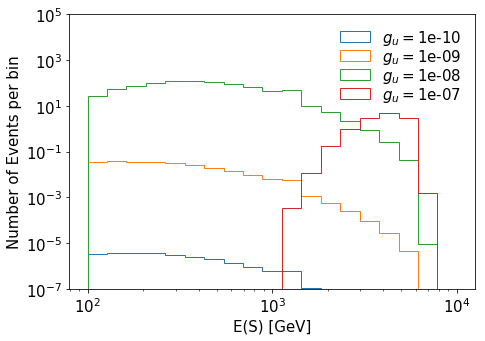

In [12]:
fig = plt.figure(figsize=(7,5))
ax = plt.subplot(1,1,1)
for coup,en,weight in zip(coups,energies,weights):
    if sum(weight)<10**-5 : continue
    ax.hist(en, weights=weight, bins=np.logspace(2,4, 20), histtype='step', label=r"$g_u=$"+str(coup)) 
    ax.set_xscale("log")
    ax.set_yscale("log")
    ax.set_ylim(10**-7,10**5) 
    ax.set_xlabel("E(S) [GeV]") 
    ax.set_ylabel("Number of Events per bin") 
    ax.legend(frameon=False, labelspacing=0)
plt.tight_layout()
plt.show()

## 5. Parameter Scan

In the following, we will get the LLP sensitivity reach for different detector configuraions. As an example, we show the FASER2 reach for dark photons for 3 scenarios. We just need to loop over different masses and use the previously introduced funtion `get_events`. The results will be written into a `.npy` file that we can store and plot later.

- the nominal/default setup

In [13]:
#specify setup
if energy == "14": luminosity, distance = 3000 , 480
if energy == "27": luminosity, distance = 15000, 480
if energy == "100": luminosity, distance = 30000, 1000
setup, selection, channels = "default", "np.sqrt(x.x**2 + x.y**2)< 1", None
foresee.set_detector(selection=selection, channels=channels, distance=distance, luminosity=luminosity)

#get reach  
list_nevents = []    
for mass in masses:
    couplings, _, nevents, _, _ , _ = foresee.get_events(mass=mass, energy=energy, couplings = np.logspace(-10,0,101))
    list_nevents.append(nevents)  
        
#save results
np.save("files/models/"+modelname+"/results/"+energy+"TeV_"+setup+".npy",[masses,couplings,list_nevents])

- the FASER setup

In [14]:
#specify setup
setup, selection, length, channels, luminosity = "FASER", "np.sqrt(x.x**2 + x.y**2)< 0.1", 1.5, None, 150
foresee.set_detector(selection=selection, channels=channels, distance=distance, length=length, luminosity=luminosity)

#get reach 
list_nevents = []    
for mass in masses:
    couplings, _, nevents, _, _ , _ = foresee.get_events(mass=mass, energy=energy, couplings = np.logspace(-10,0,101))
    list_nevents.append(nevents)  
        
#save results
np.save("files/models/"+modelname+"/results/"+energy+"TeV_"+setup+".npy",[masses,couplings,list_nevents])

## 6. Plot the Results

Now let's plot the results. We first specify all detector setups for which we want to show result (filename in model/results directory, label, color, linestyle, opacity alpha for filled contours, required number of events).

In [15]:
setups = [ 
    ["14TeV_FASER.npy",      "FASER"    , "firebrick",   "solid", 0., 3],
    ["14TeV_default.npy",    "FASER 2"  , "red",         "solid", 0., 3],
]

Then we specify all the existing bounds (filename in model/bounds directory, label, label position x, label position y, label rotation)

In [16]:
bounds = [ 
    ["bounds_BBN.txt"       , "BBN"    , 0.200, 5.0*10**-10, 0  ],
    ["bounds_MAMI.txt"      , "MAMI"   , 0.210, 2.5*10**-3 , 0  ],
    ["bounds_CHARM.txt"     , "CHARM"  , 0.200, 1.5*10**-5 , 0  ],
    ["bounds_CHARM2.txt"    , None     , 0.   , 0.         , 0  ],
    ["bounds_E137.txt"      , "E137"   , 0.215, 2.1*10**-4 , 0 ],
    ["bounds_SN1987.txt"    , "SN1987" , 0.2  , 1.0*10**-8 , 0  ],
    ["bounds_KLOE.txt"      , "KLOE"   , 0.358, 3.4*10**-4 , 90 ],
    ["bounds_BES3.txt"      , "BES3"   , 0.500, 3.0*10**-3 , 0  ],
]

We then specify other projected sensitivitities (filename in model/bounds directory, color, label, label position x, label position y, label rotation)

In [17]:
projections = [
    ["limits_SHiP.txt",       "teal",         "SHiP"    , 0.600, 1.0*10**-9, 0  ],
    ["limits_REDTOP.txt",     "dodgerblue",   "REDTOP"  , 0.410, 5.0*10**-6, 0  ],
]

Finally, we can plot everything using `foresee.plot_reach()`. It returns a matplotlib instance, to which we can add further lines and which we can show or save. Below, we add the dark matter relict target line for a specific benchmark.

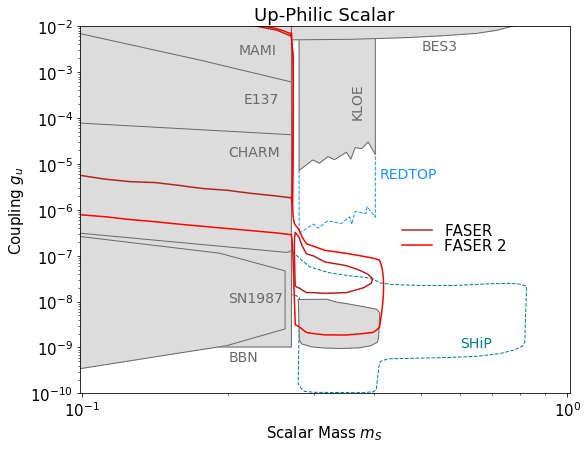

In [18]:
plot = foresee.plot_reach(
    setups=setups,
    bounds=bounds,
    projections=projections,
    title="Up-Philic Scalar", 
    xlims=[0.099,1.01], 
    ylims=[10**-10,10**-2],
    xlabel=r"Scalar Mass $m_S$", 
    ylabel=r"Coupling $g_u$",
    legendloc=(0.90,0.50),
    figsize=(8,6),
)

plot.subplots_adjust(left=0.12, right=0.97, bottom=0.10, top=0.95)
plot.savefig("/Users/felixkling/Downloads/Figure.pdf")
plot.show()